In [73]:
%reload_ext autoreload
%autoreload 2
from archive import pipeline
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [104]:
df = pipeline.load_data()

In [5]:
plot_var = df['eviction-rate']

In [8]:
df['eviction-rate'].describe()

count     27889.000000
mean         57.509008
std        4422.867253
min           0.000000
25%           1.740000
50%           3.640000
75%           6.980000
max      600000.100000
Name: eviction-rate, dtype: float64

## Plots of Eviction Rate by Year per GEOID with Null Values

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


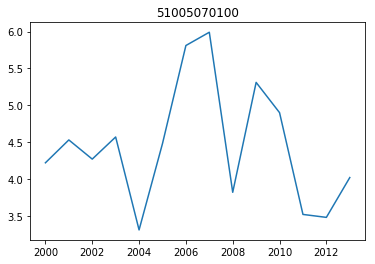

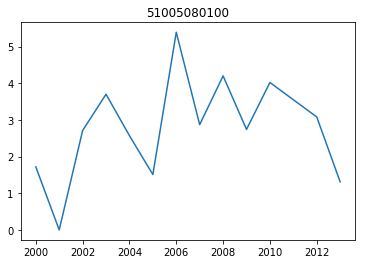

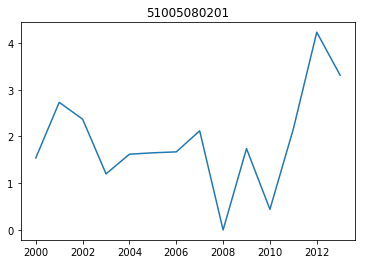

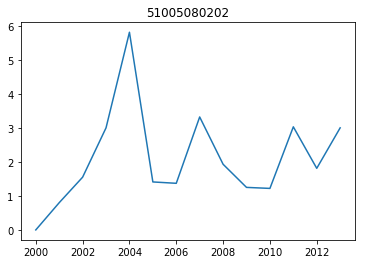

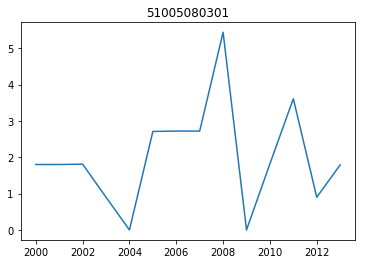

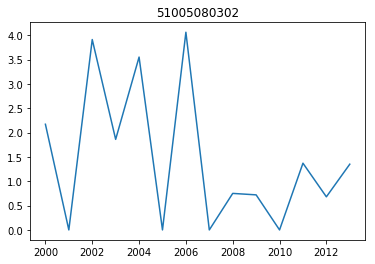

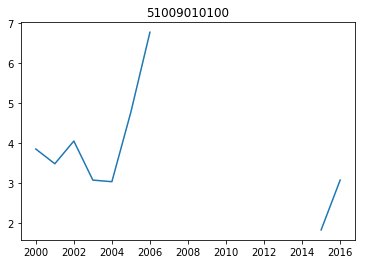

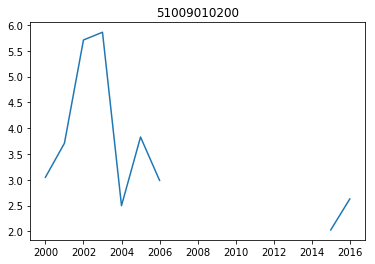

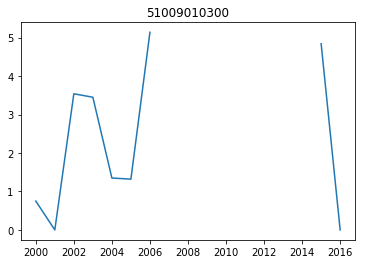

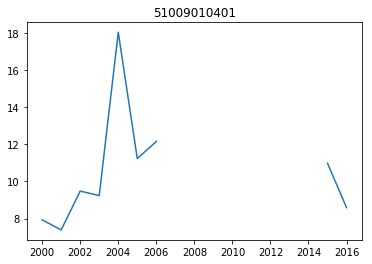

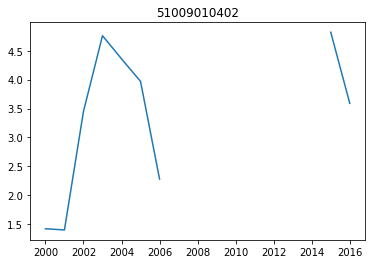

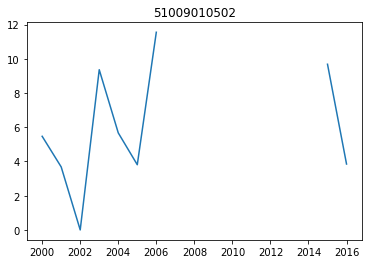

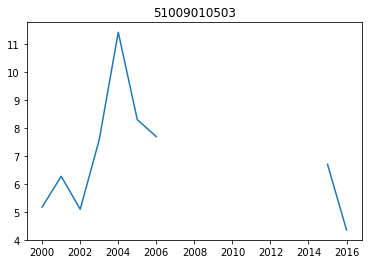

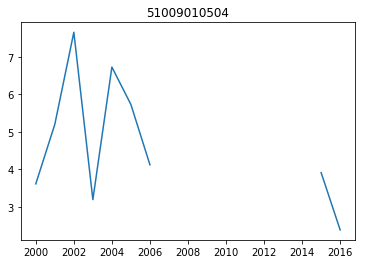

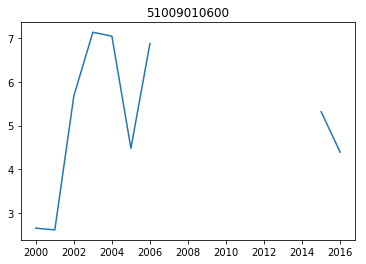

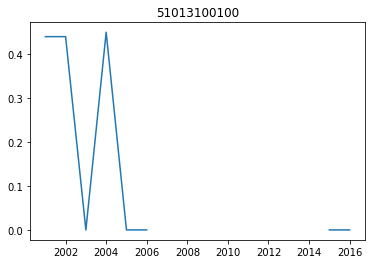

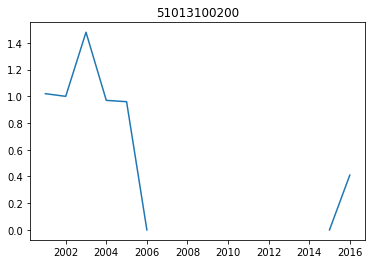

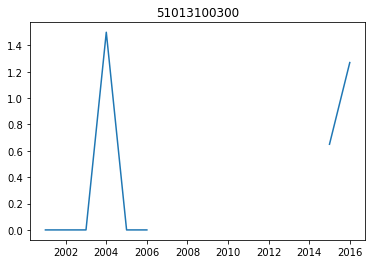

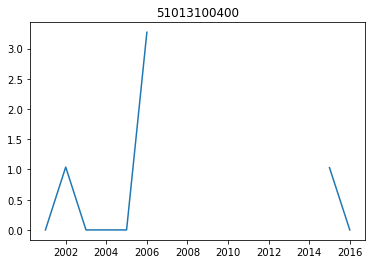

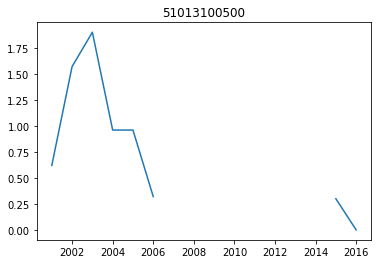

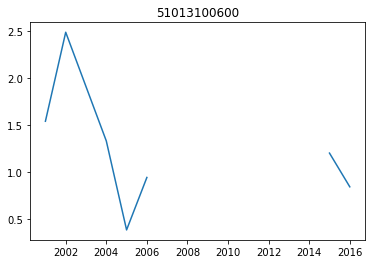

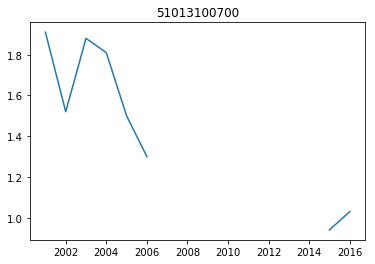

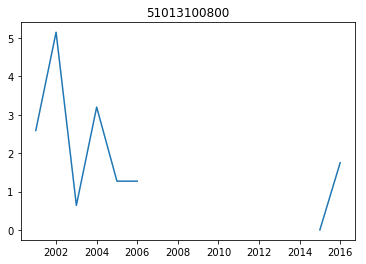

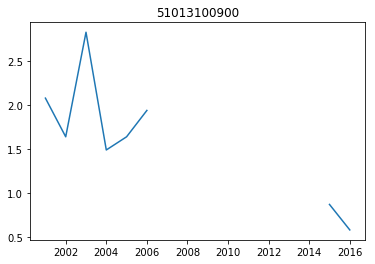

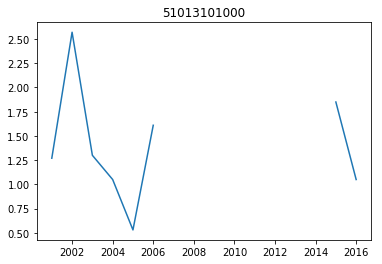

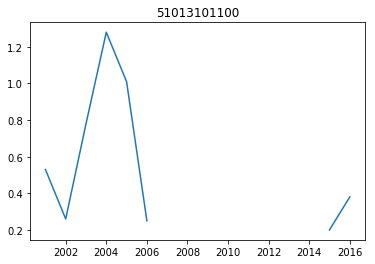

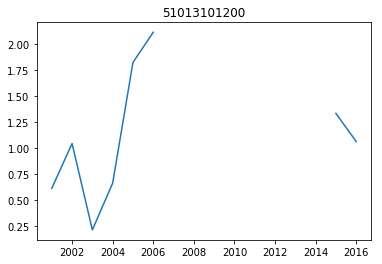

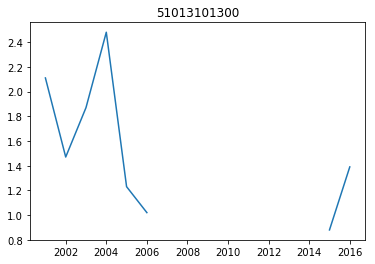

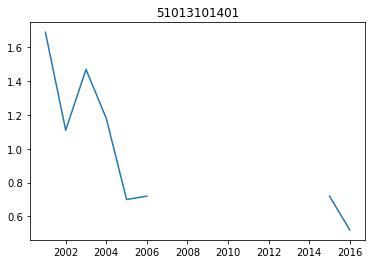

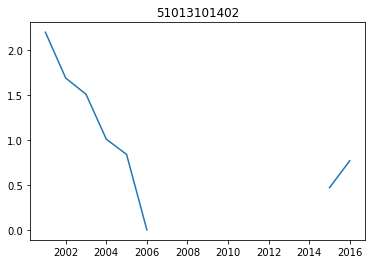

In [102]:
NAN_GEOIDS = df[df['eviction-rate'].isna()].GEOID.unique()
for x in NAN_GEOIDS[:30]:
    tst = df[df['GEOID'] == x]
    plt.figure()
    plt.plot(tst['year'], tst['eviction-rate'])
    plt.title(x)

## Columns with Number of Missing Values

In [107]:
df.isnull().sum(axis=0)

GEOID                            0
year                             0
name                             0
parent-location                  0
population                       6
poverty-rate                     6
renter-occupied-households       6
pct-renter-occupied              6
median-gross-rent              492
median-household-income        282
median-property-value          486
rent-burden                    425
pct-white                        6
pct-af-am                        6
pct-hispanic                     6
pct-am-ind                       6
pct-asian                        6
pct-nh-pi                        6
pct-multiple                     6
pct-other                        6
eviction-filings              4536
evictions                     4536
eviction-rate                 4536
eviction-filing-rate          4536
low-flag                         0
imputed                          0
subbed                           0
dtype: int64

## Plots of Eviction Rate by Year per GEOID with at least 1 year ER = 0

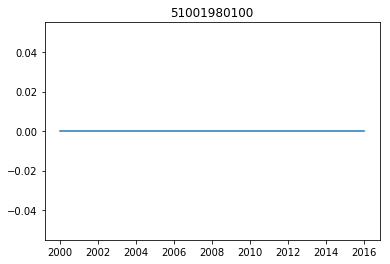

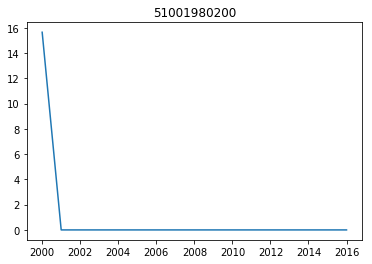

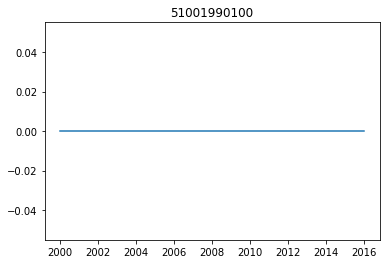

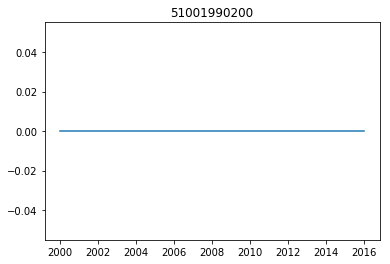

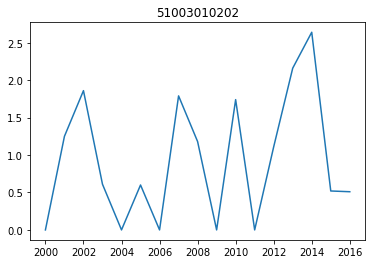

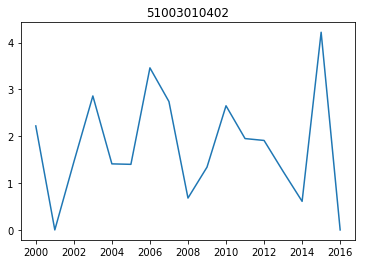

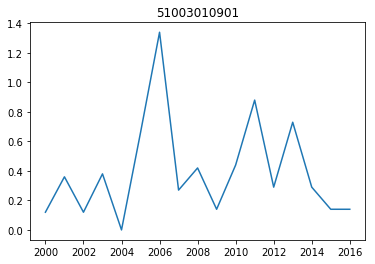

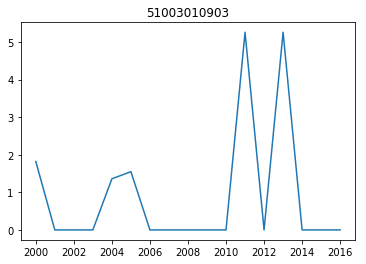

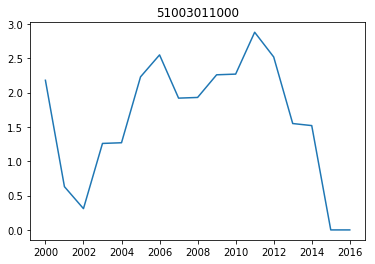

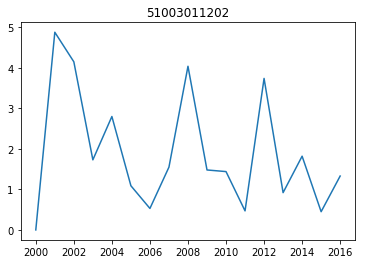

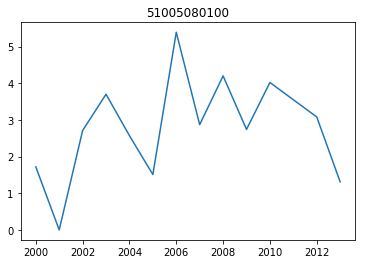

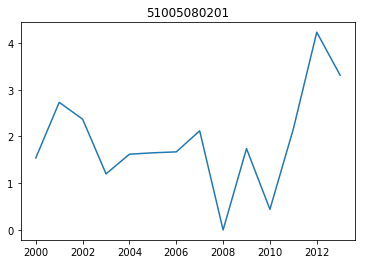

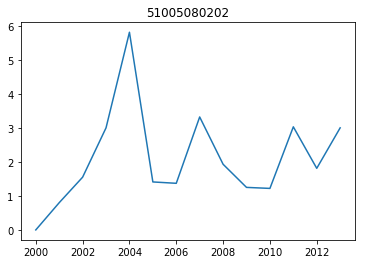

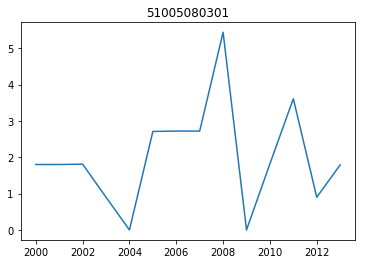

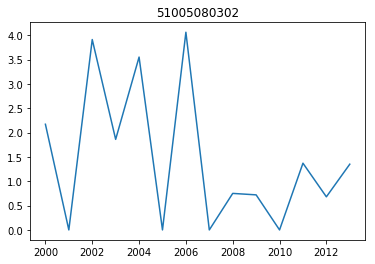

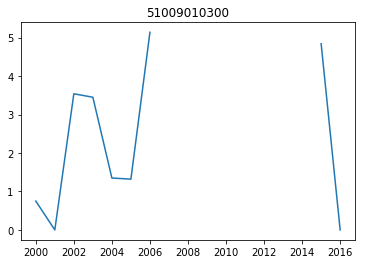

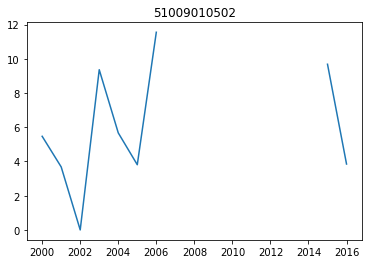

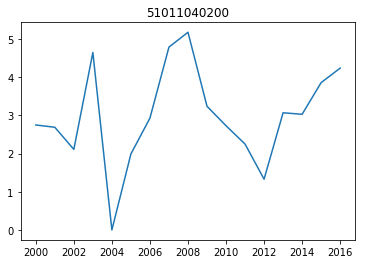

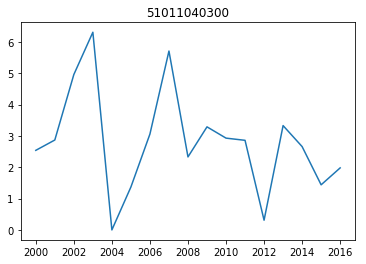

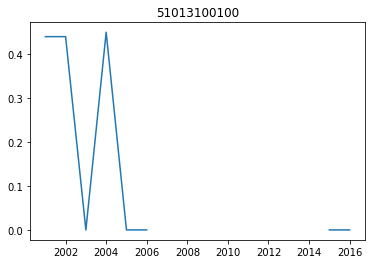

In [103]:
GEOIDS = df[df['eviction-rate'] == 0].GEOID.unique()

for x in GEOIDS[:20]:
    tst = df[df['GEOID'] == x]
    plt.figure()
    plt.plot(tst['year'], tst['eviction-rate'])
    plt.title(x)
    